**Hash functions and multiplanes**



**Basic Hash tables**

Hash tables are data structures that allow indexing data to make lookup tasks more efficient. In this part, you will see the implementation of the simplest hash function.

In [1]:
import numpy as np
import pprint
from utils import plot_vectors
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent = 4)

In [3]:
def basic_hash_table(value_1, n_buckets):
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)}
    
    for value in value_1:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value] = value
    
    return hash_table

In [4]:
value_l = [100, 10, 14, 17, 97] # Set of values to hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)


{0: 10, 1: [], 2: [], 3: [], 4: 14, 5: [], 6: [], 7: 97, 8: [], 9: []}


**Planes**

Multiplanes hash functions are other types of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes. In the following code, we show the most basic forms of the multiplanes principle. First, with a single plane:

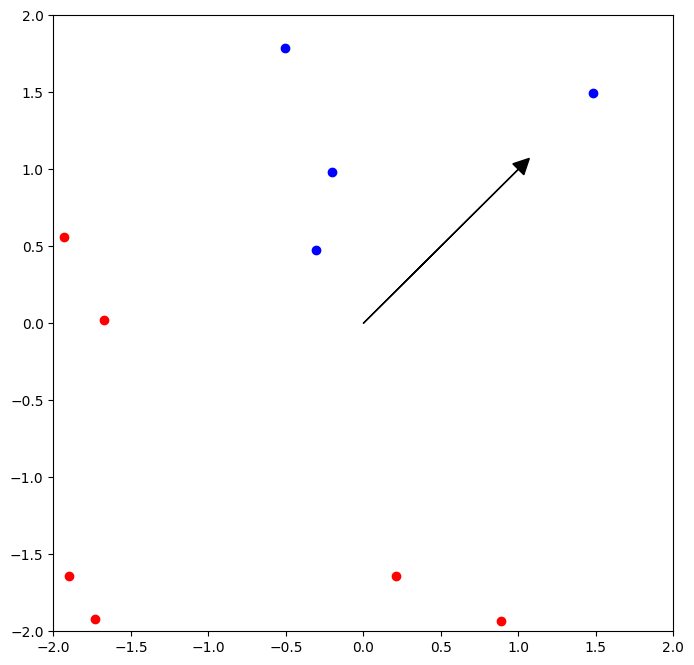

In [9]:
P = np.array([[1, 1]])
fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot
plot_vectors([P], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

for i in range(0, 10):
    v1 = np.array(np.random.uniform(-2, 2, 2))  # Get a pair of random numbers between -4 and 4 
    side_of_plane = np.sign(np.dot(P, v1.T))
    
    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro') # Plot red points

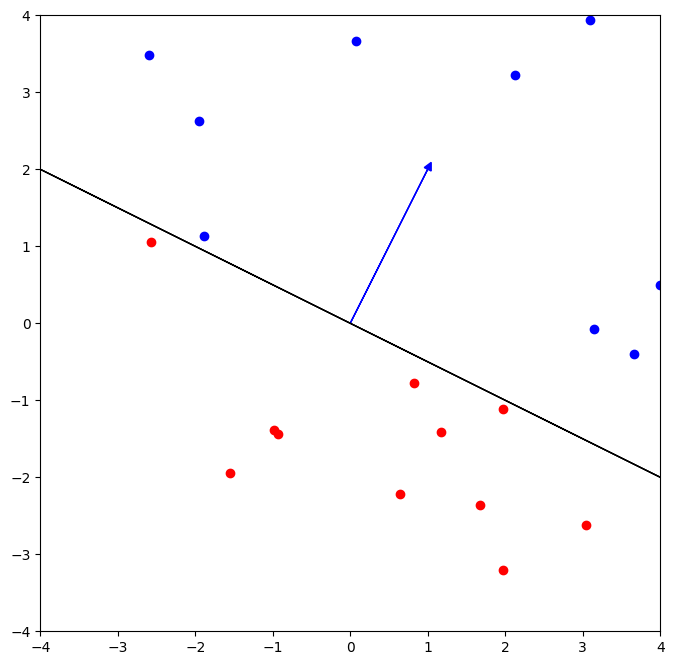

In [16]:
P = np.array([[1, 2]])  # Define a single plane. You may change the direction

# Get a new plane perpendicular to P. We use a rotation matrix
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot with custom size

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot the plane P as a 2 vectors. 
# We scale by 2 just to get the arrows outside the current box
plot_vectors([PT *4 , PT * -4 ], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plot 20 random points. 
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot a blue point
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot a red point

plt.show()

In [17]:
P = np.array([[1, 1]])      # Single plane
v1 = np.array([[1, 2]])     # Sample point 1
v2 = np.array([[-1, 1]])    # Sample point 2
v3 = np.array([[-2, -1]])   # Sample point 3

In [18]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P * v'
    sign_of_dot_product = np.sign(dotproduct) # The sign of the elements of the dotproduct matrix 
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

In [19]:
side_of_plane(P, v1) # In which side is [1, 2]

1

In [20]:
side_of_plane(P, v2) # In which side is [-1, 1]

0

In [21]:
side_of_plane(P, v3) # In which side is [-2, -1]

-1

**Hash Function with multiple planes**